**Contexto y audiencia**

Hoy en día, las redes sociales forman parte de nuestra vida diaria, y como profesora, me interesa mucho entender cómo esto afecta a los estudiantes. Este proyecto usa el dataset Students’ Social Media Addiction vs Relationships, que recopila información sobre hábitos de uso de redes sociales y cómo estos influyen en las relaciones personales y el rendimiento académico de los estudiantes.

La motivación detrás de este análisis es que las redes sociales pueden ser muy entretenidas, pero también generan distracciones, estrés o problemas de concentración. La idea es explorar los patrones de uso, ver si hay diferencias según edad, género o país, y entender qué factores se relacionan con niveles más altos de adicción.

Este trabajo está pensado para profesores, estudiantes y cualquier persona interesada en el impacto de las redes sociales, ya que les permite entender cómo los hábitos de uso afectan el rendimiento académico, las relaciones personales y el bienestar general, y así tomar decisiones más informadas sobre el uso de estas plataformas.

**Hipótesis/Preguntas de interés**

1. A mayor número de horas que los estudiantes pasan en redes sociales, mayor es el impacto negativo en sus relaciones personales.

   ¿Podemos identificar subgrupos de estudiantes según sus hábitos de redes sociales y nivel de afectación en relaciones o rendimiento?
2. Se puede predecir si un estudiante es “adicto” o “no adicto” a redes sociales a partir de variables como edad, género y tiempo de uso diario.

   ¿Podemos clasificar a los estudiantes en niveles de adicción usando sus características y hábitos?
3. El número de horas diarias en redes sociales puede predecir el nivel de impacto académico negativo de un estudiante.

   ¿Cuánto aumenta el impacto académico negativo a medida que los estudiantes pasan más horas en redes sociales?
4. Existen grupos de estudiantes con patrones similares de uso de redes sociales y efectos en relaciones o rendimiento académico.

   ¿Podemos identificar subgrupos de estudiantes según sus hábitos de redes sociales y nivel de afectación en relaciones o rendimiento?


**Importación de librerías**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Carga de datos**

In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Students Social Media Addiction.csv")
df.head()

Saving Students Social Media Addiction.csv to Students Social Media Addiction (2).csv


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


**ANÁLISIS EXPLORATORIO DE DATOS (EDA)**



*   Primera mirada a los datos



In [ ]:
df.shape
df.info()
df.describe()
df.columns
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

,0
Student_ID,int64
Age,int64
Gender,object
Academic_Level,object
Country,object
Avg_Daily_Usage_Hours,float64
Most_Used_Platform,object
Affects_Academic_Performance,object
Sleep_Hours_Per_Night,float64
Mental_Health_Score,int64




*   Identificación de valores nulos



In [ ]:
df.isnull().sum()

,0
Student_ID,0
Age,0
Gender,0
Academic_Level,0
Country,0
Avg_Daily_Usage_Hours,0
Most_Used_Platform,0
Affects_Academic_Performance,0
Sleep_Hours_Per_Night,0
Mental_Health_Score,0


Como en este caso no hay valores nulos, no es necesario realizar ninguna modificación del dataset en base a esto.



*   Distribución de variables categóricas



In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Relationship_Status'],
      dtype='object')


In [ ]:
df[['Gender', 'Country', 'Relationship_Status', 'Academic_Level', 'Most_Used_Platform', 'Affects_Academic_Performance']].nunique()

,0
Gender,2
Country,110
Relationship_Status,3
Academic_Level,3
Most_Used_Platform,12
Affects_Academic_Performance,2


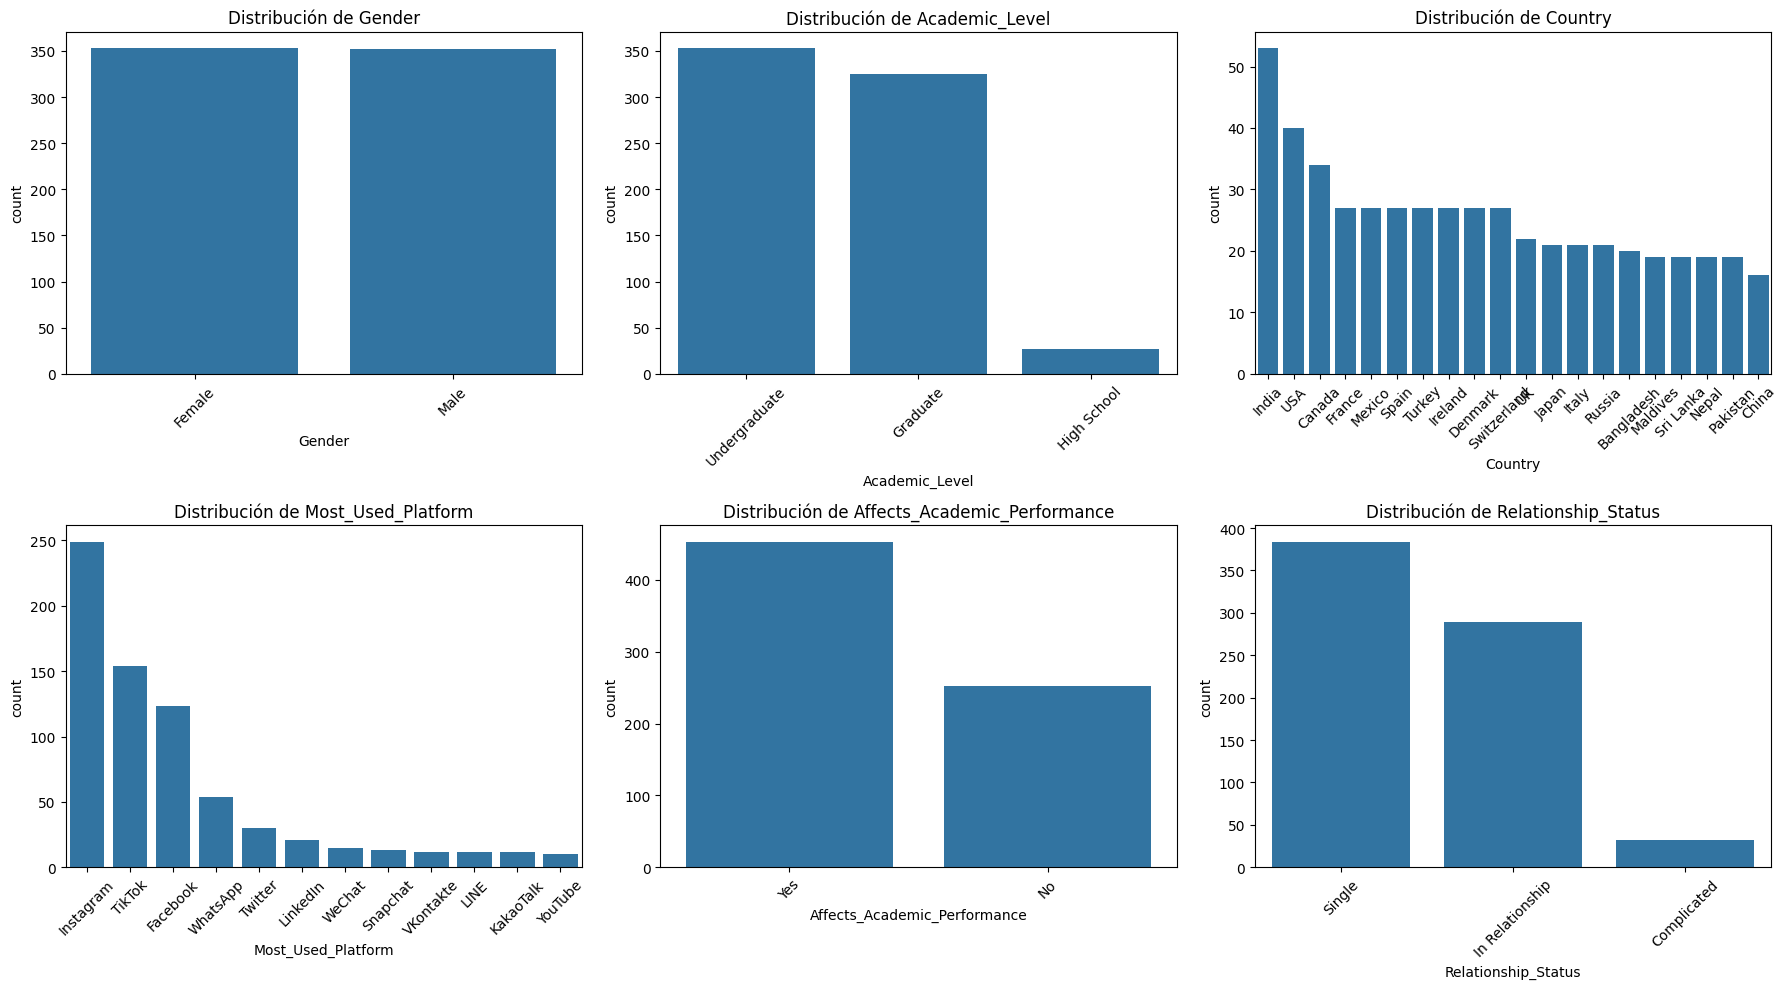

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, col in enumerate(categorical_cols):
    row = i // 3
    col_idx = i % 3

    if col == "Country":
        top_n = 20
        top_categories = df[col].value_counts().index[:top_n]
        sns.countplot(
            x=col,
            data=df[df[col].isin(top_categories)],
            order=top_categories,
            ax=axes[row, col_idx]
        )
    else:
        sns.countplot(
            x=col,
            data=df,
            order=df[col].value_counts().index,
            ax=axes[row, col_idx]
        )

    axes[row, col_idx].set_title(f'Distribución de {col}')
    axes[row, col_idx].tick_params(axis='x', rotation=45)

if len(categorical_cols) < axes.size:
    for j in range(len(categorical_cols), axes.size):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

Ya que la columna Country posee demasiados datos, el gráfico no se veía ordenado, por lo que de esa variable específica, decidí que la distribución solo mostrara los 20 países que más aparecen.



*   Análisis de variables numéricas



In [ ]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['Student_ID', 'Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')

In [ ]:
df[['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']].describe()

,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [ ]:
df[['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']].nunique()

,0
Age,7
Avg_Daily_Usage_Hours,67
Sleep_Hours_Per_Night,59
Mental_Health_Score,6
Conflicts_Over_Social_Media,6
Addicted_Score,8




*   Distribución de variables numéricas



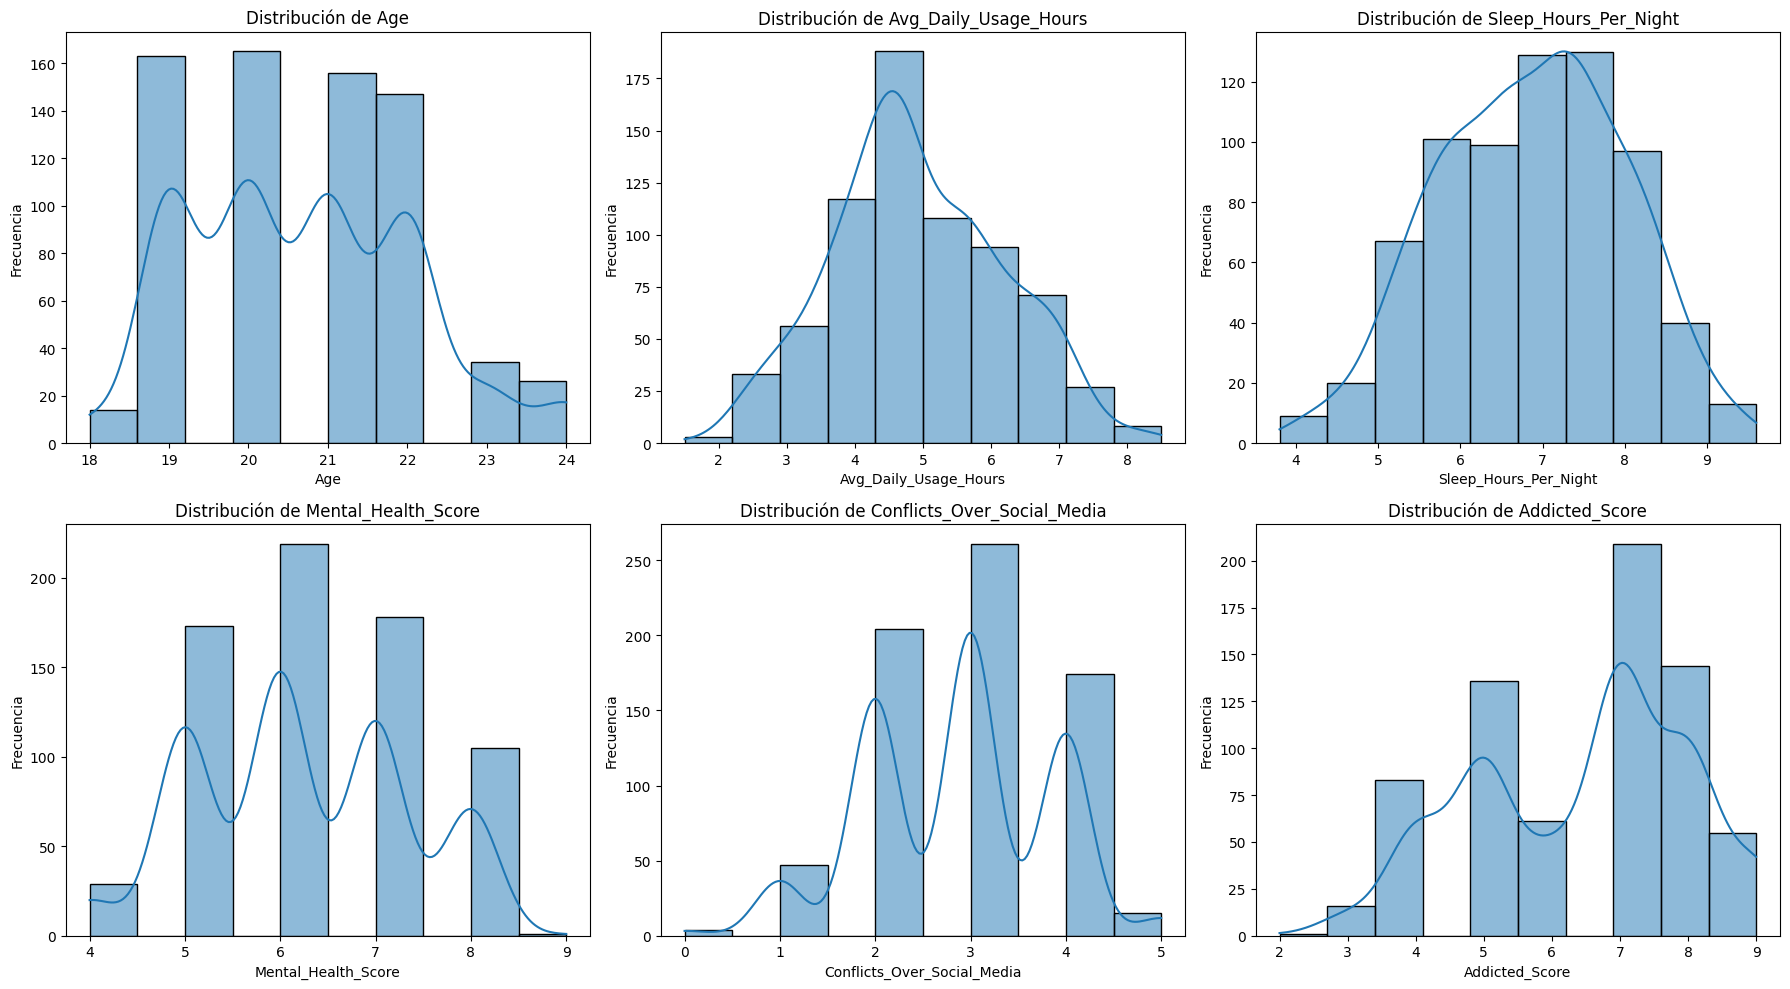

In [ ]:
num_cols = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
            'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, col in enumerate(num_cols):
    row = i // 3
    col_idx = i % 3
    sns.histplot(df[col], bins=10, kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribución de {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

Realizo boxplots para chequear la existencia de outliers.

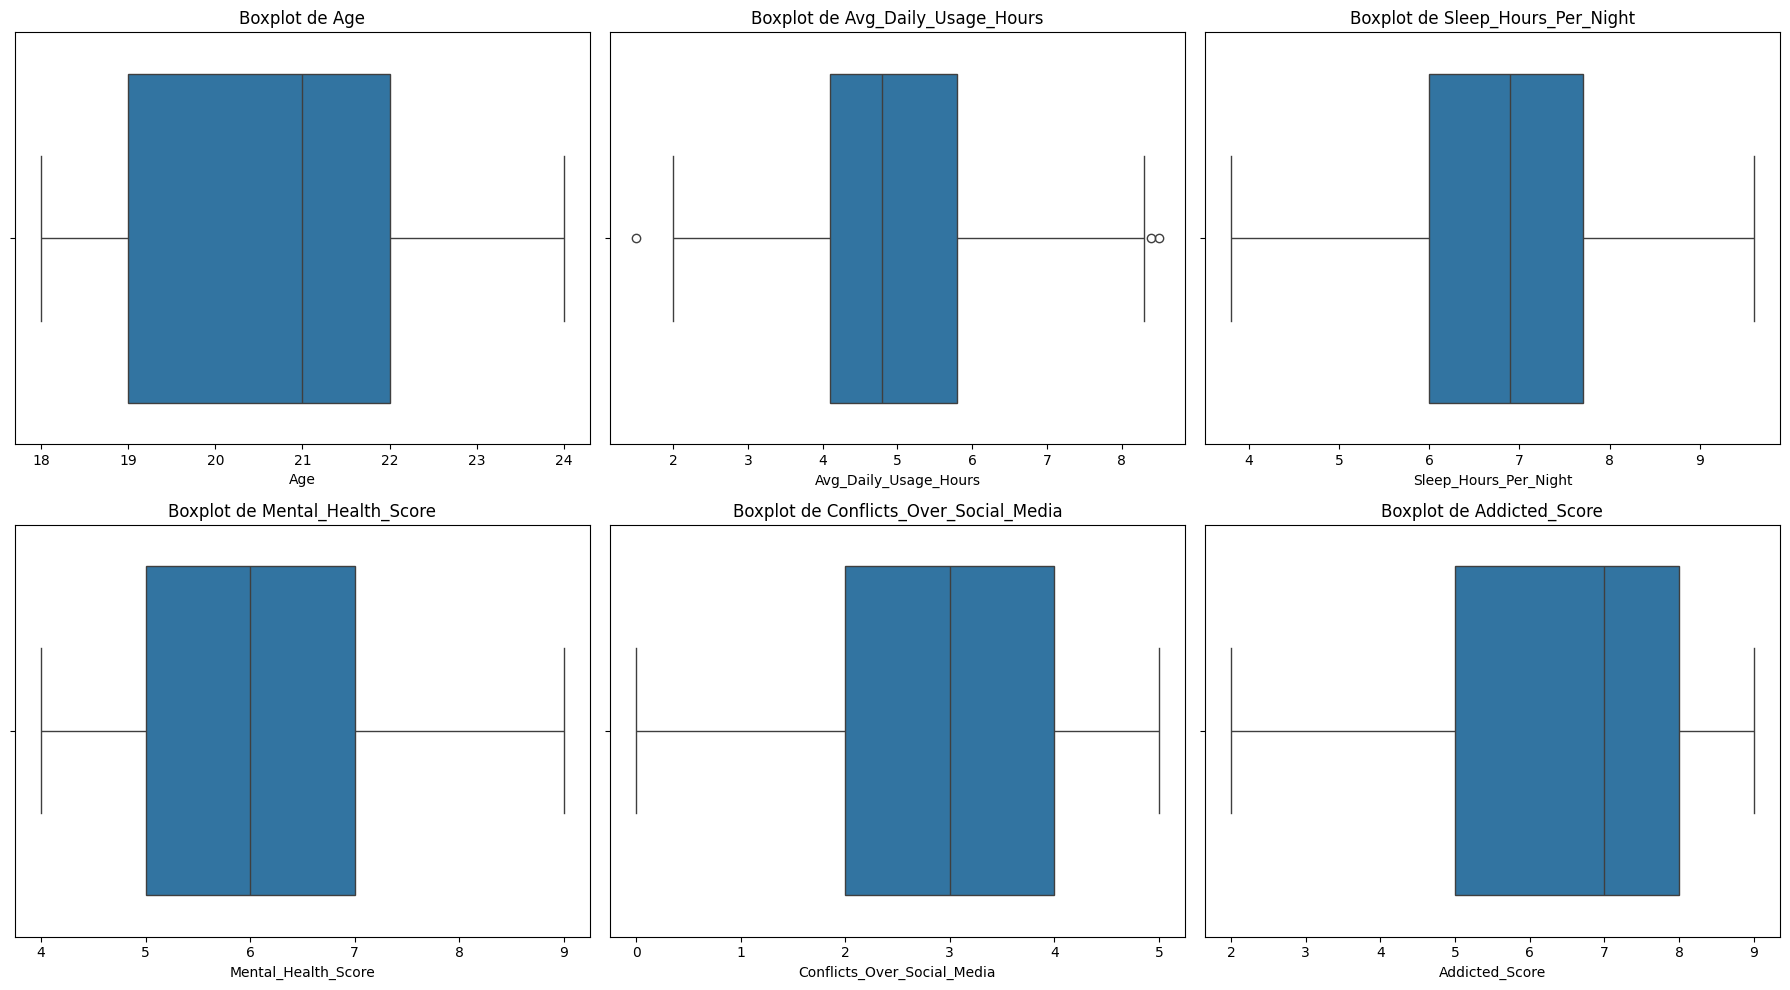

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
for i, col in enumerate(num_cols):
    row = i // 3
    col_idx = i % 3
    sns.boxplot(x=df[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Boxplot de {col}')

plt.tight_layout()
plt.show()

De acuerdo a los boxplots, no hay demasiados outliers. Solo la columna de Avg_Daily_Usage_Hours (cantidad de horas que utiliza redes sociales por día), contiene algunos pocos outliers según el gráfico.

Hago un mapa de correlación de variables numéricas para ver si hay relaciones lineales.

                                  Age  Avg_Daily_Usage_Hours  \
Age                          1.000000              -0.113682   
Avg_Daily_Usage_Hours       -0.113682               1.000000   
Sleep_Hours_Per_Night        0.125265              -0.790582   
Mental_Health_Score          0.160278              -0.801058   
Conflicts_Over_Social_Media -0.184482               0.804582   
Addicted_Score              -0.166396               0.832000   

                             Sleep_Hours_Per_Night  Mental_Health_Score  \
Age                                       0.125265             0.160278   
Avg_Daily_Usage_Hours                    -0.790582            -0.801058   
Sleep_Hours_Per_Night                     1.000000             0.707439   
Mental_Health_Score                       0.707439             1.000000   
Conflicts_Over_Social_Media              -0.677266            -0.893572   
Addicted_Score                           -0.764858            -0.945051   

                         

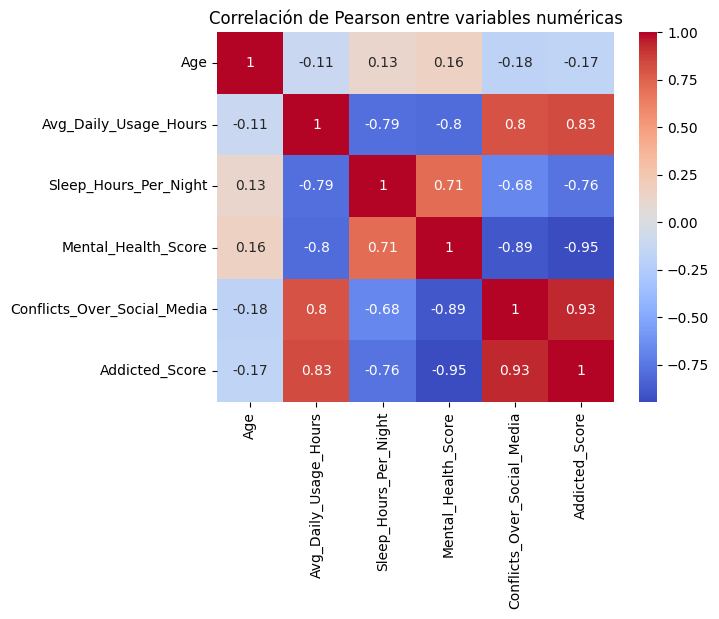

In [ ]:
corr_matrix = df[num_cols].corr(method='pearson')
print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlación de Pearson entre variables numéricas')
plt.show()



*   Visualizaciones en cuanto a las hipótesis/preguntas de interés

*Hipótesis 1:*

A mayor número de horas que los estudiantes pasan en redes sociales, mayor es el impacto negativo en sus relaciones personales y salud mental.

¿Podemos identificar subgrupos de estudiantes según sus hábitos de redes sociales y nivel de afectación en relaciones o salud?

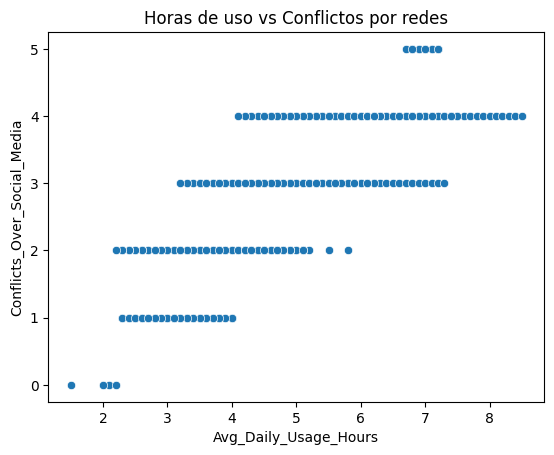

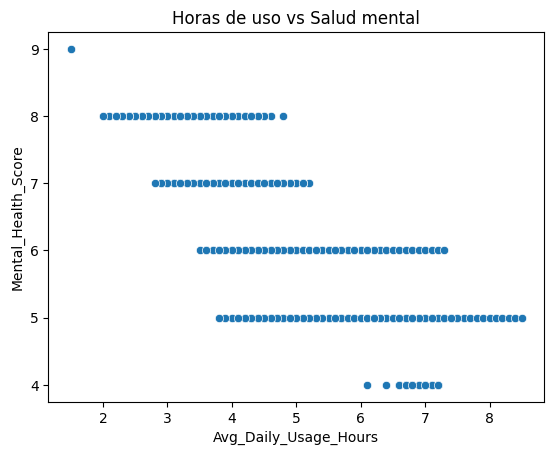

In [ ]:
sns.scatterplot(x='Avg_Daily_Usage_Hours', y='Conflicts_Over_Social_Media', data=df)
plt.title('Horas de uso vs Conflictos por redes')
plt.show()

sns.scatterplot(x='Avg_Daily_Usage_Hours', y='Mental_Health_Score', data=df)
plt.title('Horas de uso vs Salud mental')
plt.show()

En el primer gráfico, "Horas de uso vs. Conflictos por redes", se observa una tendencia ascendente: quienes usan las redes más horas al día tienden a reportar más conflictos interpersonales relacionados con las redes. Para estudiantes con alrededor de 2–3 horas de uso, los conflictos suelen ser bajos (0–2). A partir de 6–7 horas diarias, aparecen niveles altos de conflicto (4–5).

Esto apoya la hipótesis: más tiempo en redes = más conflictos.

En el segundo gráfico, "Horas de uso vs. Salud mental", también se observa un patrón: con pocas horas (2–3) los puntajes de salud mental son más altos (7–9).
A medida que aumenta el uso (5–7 horas), los puntajes de salud mental tienden a concentrarse entre 4–6, indicando un empeoramiento en la salud mental.
El grupo de más de 7 horas prácticamente no tiene puntajes altos de salud mental.

Esto también respalda la hipótesis: más uso = peor salud mental.

Entonces, podemos identificar al menos tres perfiles de estudiantes:

Bajo uso (3 horas por día o menos): pocos conflictos, buena salud mental.
Uso moderado (4–5 horas/día): algunos conflictos, salud mental intermedia.
Uso alto (6 horas por día o más): muchos conflictos, salud mental más baja.

Los gráficos respaldan la hipótesis. Se ven subgrupos diferenciados y una relación clara entre mayor uso, más conflictos y peor salud mental.

*Hipótesis 2:*

Se puede predecir si un estudiante es “adicto” o “no adicto” a redes sociales a partir de variables como edad, género y tiempo de uso diario.

¿Podemos clasificar a los estudiantes en niveles de adicción usando sus características y hábitos?

Para realizar este análisis, decidí que convenía cambiar la columna "Addicted_Score" a variable categórica, ya que el análisis que esta hipótesis ameritaría, es uno de clasificación. Para esto, primero vuelvo a revisar los valores y distribución, mínimo, máximo, media y cuartiles.

In [ ]:
df['Addicted_Score'].unique()

array([8, 3, 9, 4, 7, 2, 5, 6])

In [ ]:
df['Addicted_Score'].value_counts().sort_index()
df['Addicted_Score'].describe()

,Addicted_Score
count,705.000000
mean,6.436879
std,1.587165
min,2.000000
25%,5.000000
50%,7.000000
75%,8.000000
max,9.000000


Tenía la idea de realizar dos categorías (adicto/no adicto). Sin embargo, luego de analizar los datos de la columna, considero que va a ser más útil utilizar cuatro categorías (no adicto/adicto leve/adicto moderado/adicto fuerte), ya que de esta manera es más informativo, refleja gradientes de adicción y permite analizar diferencias más finas entre los estudiantes.

In [ ]:
def categorize_addiction(score):
    if score <= 3:
        return 'No adicto'
    elif 4 <= score <= 5:
        return 'Adicto leve'
    elif 6 <= score <= 7:
        return 'Adicto moderado'
    else:
        return 'Adicto fuerte'

df['Addicted_Category'] = df['Addicted_Score'].apply(categorize_addiction)

print(df['Addicted_Category'].value_counts())

Addicted_Category
Adicto moderado    270
Adicto leve        219
Adicto fuerte      199
No adicto           17
Name: count, dtype: int64


Ahora sí, realizaré los gráficos para analizar la hipótesis planteada: Se puede predecir si un estudiante es “adicto” o “no adicto” a redes sociales a partir de variables como edad, género y tiempo de uso diario.

Realizo dos boxplots para ver cómo se relacionan la edad y las horas de uso con el nivel de adicción.

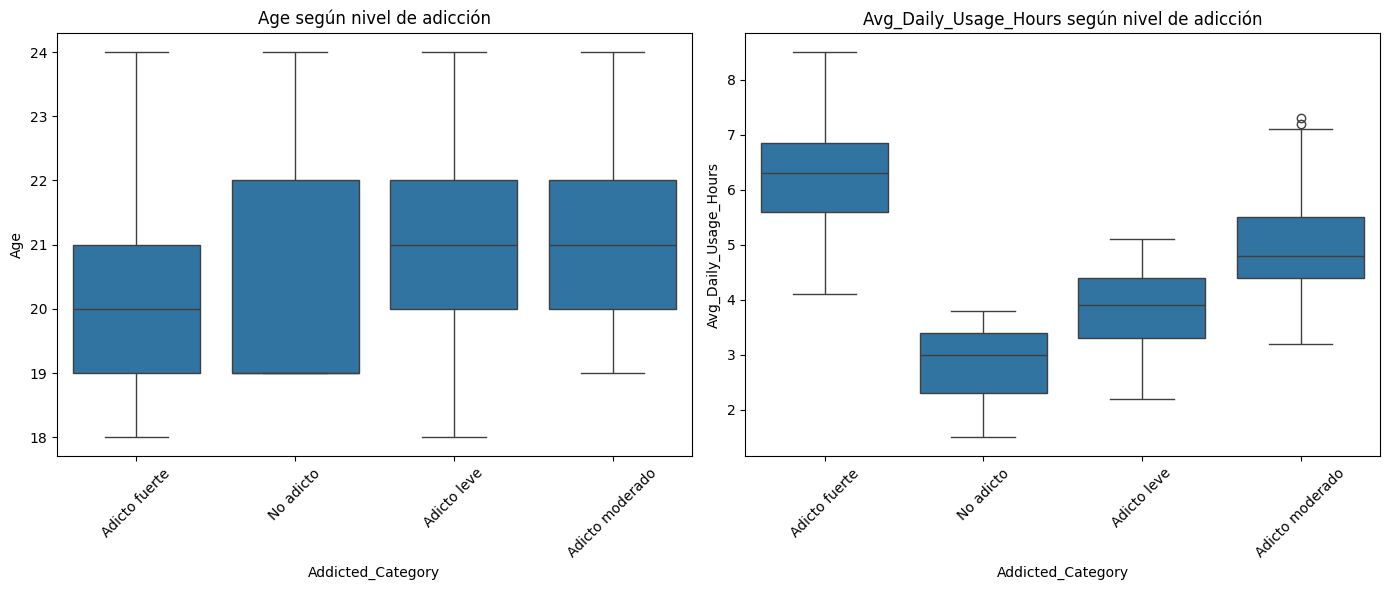

In [ ]:
num_cols = ['Age', 'Avg_Daily_Usage_Hours']
cat_cols = ['Gender']

fig, axes = plt.subplots(1, len(num_cols), figsize=(14,6))
for i, col in enumerate(num_cols):
    sns.boxplot(x='Addicted_Category', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} según nivel de adicción')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

Gráfico de Edad según nivel de adicción

Todos los grupos tienen un rango muy similar (18–24 años aproximadamente).
No adicto tiene una mediana ligeramente más alta que Adicto fuerte.
Adicto leve y Adicto moderado están en la mediana 20–21 años.

La edad por sí sola parece no ser un predictor fuerte, porque los rangos se superponen mucho entre todas las categorías. Es difícil clasificar a un estudiante solo con la edad.

Gráfico de Horas de uso diario según nivel de adicción

Tendencia clara:
Adicto fuerte: mediana alrededor de 6–7 horas.

Adicto moderado: mediana alrededor de 4.5–5 horas.

Adicto leve: mediana alrededor de 3.5–4 horas.

No adicto: mediana alrededor de 2.5–3 horas.

El tiempo de uso diario es un indicador más confiable del nivel de adicción. Se observan diferencias claras entre los grupos, aunque hay algunos outliers (personas que usan mucho tiempo pero están clasificadas como moderadas o no adictas).

Realizo un countplot para ver diferencias de género según cada nivel de adicción.

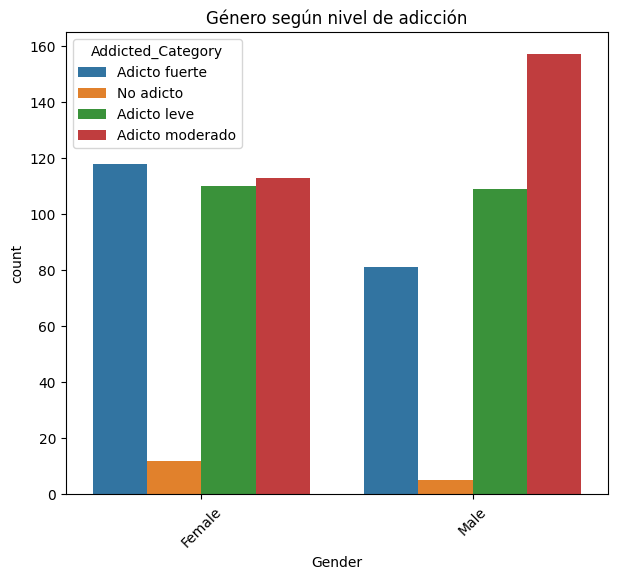

In [ ]:
if len(cat_cols) == 1:
    plt.figure(figsize=(7,6))
    sns.countplot(x=cat_cols[0], hue='Addicted_Category', data=df)
    plt.title(f'Género según nivel de adicción')
    plt.xticks(rotation=45)
    plt.show()
else:
    fig, axes = plt.subplots(1, len(cat_cols), figsize=(7*len(cat_cols),6))
    for i, col in enumerate(cat_cols):
        sns.countplot(x=col, hue='Addicted_Category', data=df, ax=axes[i])
        axes[i].set_title(f'{col} según nivel de adicción')
        axes[i].tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

La mayoría de los estudiantes, tanto hombres como mujeres, se encuentran en categorías de adicción leve, moderada o fuerte.

Los estudiantes “no adictos” son muy pocos comparativamente, más en mujeres que en hombres.

Entre los hombres, la categoría adicto moderado es la que más destaca, mientras que entre las mujeres hay un equilibrio relativo entre adicto leve, moderado y fuerte.

Esto indica que, aunque hay algunas diferencias de género en los niveles de adicción, no hay un patrón claro y fuerte que permita predecir la adicción solo por género.

Realizo un pairplot para analizar relaciones entre numéricas (edad y horas de uso) coloreadas por categoría de adicción

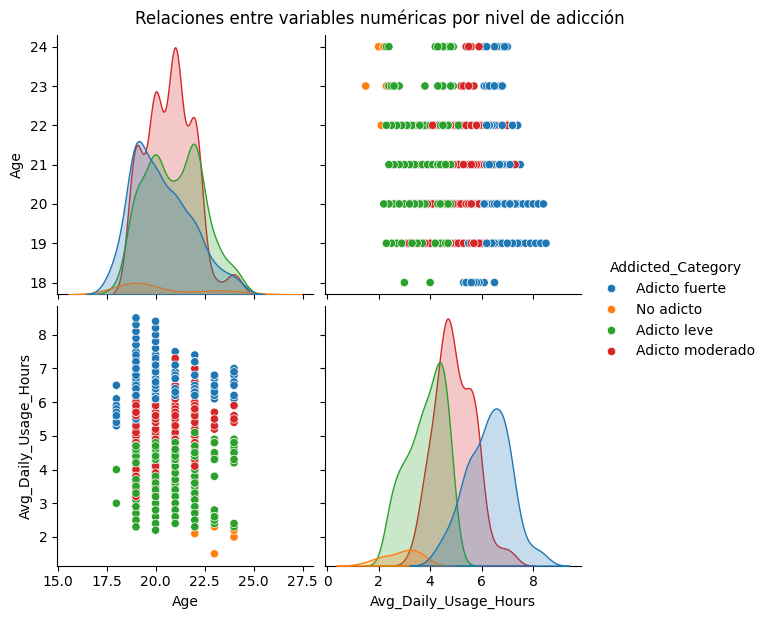

In [ ]:
sns.pairplot(df, vars=num_cols, hue='Addicted_Category', height=3)
plt.suptitle('Relaciones entre variables numéricas por nivel de adicción', y=1.02)
plt.show()

1. Distribución por edad

La mayoría de los estudiantes, independientemente de su nivel de adicción, tienen entre 19 y 23 años.

Hay cierta superposición entre las categorías, especialmente entre adictos leves, moderados y fuertes.

Esto indica que la edad sola no es un predictor fuerte de adicción.

2. Distribución por horas de uso diario

Los no adictos (naranja) tienden a usar menos horas (cerca de 2 horas promedio).

Los adictos leves y moderados (verde y rojo) usan alrededor de 3–6 horas.

Los adictos fuertes (azul) usan más de 6 horas promedio.

Aquí se ve una separación más clara, lo que sugiere que el tiempo de uso diario sí es un buen predictor del nivel de adicción.

3. Relación edad vs horas de uso

No se ve un patrón fuerte con respecto a la edad.

Sí hay una tendencia clara: más horas de uso = mayor nivel de adicción.

En términos de clasificación de niveles de adicción, es factible utilizando tiempo de uso y hábitos asociados, pero la edad no aporta mucho.

Decidí incluir un scatterplot multivariado porque los gráficos anteriores mostraron que la edad y el género por separado no aportan demasiado, mientras que las horas de uso sí. Este gráfico permite visualizar simultáneamente las tres variables predictoras propuestas en la hipótesis y comprobar si, en combinación, aportan mayor poder explicativo sobre los niveles de adicción.

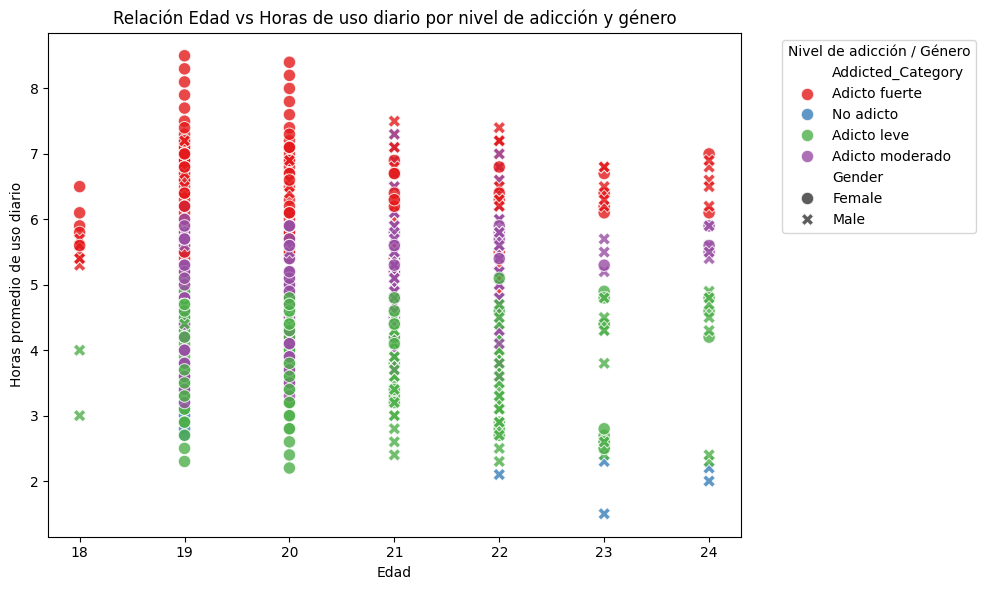

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='Age',
    y='Avg_Daily_Usage_Hours',
    hue='Addicted_Category',
    style='Gender',
    palette='Set1',
    s=80,
    alpha=0.8
)

plt.title('Relación Edad vs Horas de uso diario por nivel de adicción y género')
plt.xlabel('Edad')
plt.ylabel('Horas promedio de uso diario')
plt.legend(title='Nivel de adicción / Género', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

El gráfico multivariado de Edad vs Horas de uso, con color por nivel de adicción y forma por género, muestra de manera integrada las tres variables de la hipótesis. Se observa una separación clara de los niveles de adicción según horas de uso, mientras que la edad y el género no generan diferencias significativas. Esto confirma que, para predecir la adicción, el tiempo de uso diario es el factor más determinante, mientras que la edad y el género tienen un peso mucho menor.

*Hipótesis 3:*

El número de horas diarias en redes sociales puede predecir el nivel de impacto académico negativo de un estudiante.

¿Cuánto aumenta el impacto académico negativo a medida que los estudiantes pasan más horas en redes sociales?

Para realizar esta hipótesis, como es de regresión, porque queremos ver si Avg_Daily_Usage_Hours (predictor) explica o predice Affects_Academic_Performance (respuesta), se debe convertir Affects_Academic_PErformance a variable numérica. Como esta variable contiene solo dos tipos de dato (yes/no), lo voy a convertir en una variable binaria (Yes=1, no=0), siendo 1 que sí afecta negativamente, y 0 que no afecta negativamente.

Para hacer un análisis descriptivo inicial, realizo un gráfico que muestre el porcentaje de estudiantes que dijeron que creen que las redes sociales afectan su rendimiento académico, antes de analizar cómo influyen las horas de uso.

Gráfico de torta que muestra el porcentaje de estudiantes que dijo que el rendimiento académico se ve afectado por redes sociales.

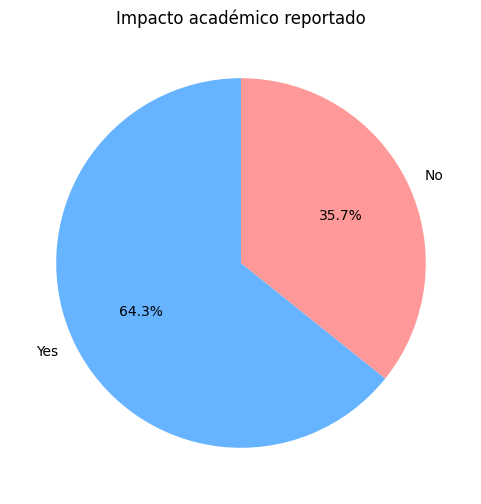

In [ ]:
df['Affects_Academic_Performance_Binary'] = df['Affects_Academic_Performance'].map({'Yes': 1, 'No': 0})

df['Affects_Academic_Performance'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    figsize=(6,6),
    colors=['#66b3ff','#ff9999']
)
plt.title('Impacto académico reportado')
plt.ylabel('')
plt.show()

Este gráfico confirma que el impacto académico es un fenómeno mayoritario.

Ahora, realizaré un gráfico de regresión logística para ver cómo las horas influyen en este impacto académico.

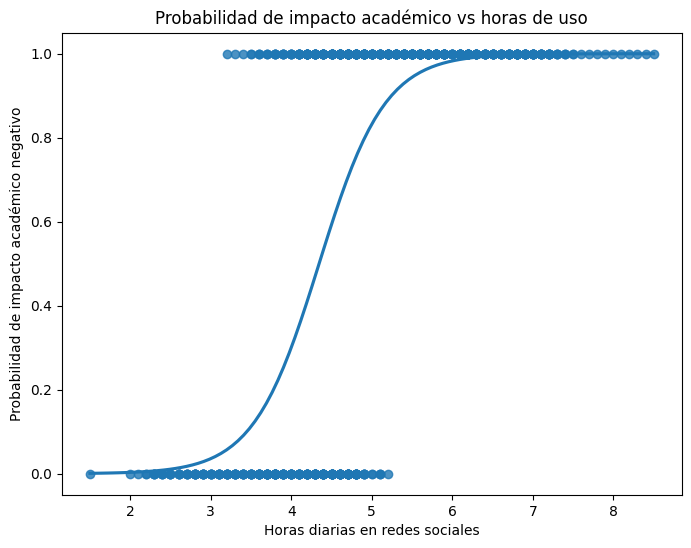

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(x='Avg_Daily_Usage_Hours',
            y='Affects_Academic_Performance_Binary',
            data=df,
            logistic=True,
            ci=None)
plt.title('Probabilidad de impacto académico vs horas de uso')
plt.xlabel('Horas diarias en redes sociales')
plt.ylabel('Probabilidad de impacto académico negativo')
plt.show()

El gráfico evidencia que las horas de uso en redes sociales tienen una relación directa con la probabilidad de impacto académico negativo. El gráfico muestra que los estudiantes que utilizan redes sociales menos de 3 horas al día tienen una probabilidad muy baja de sufrir consecuencias académicas, mientras que a partir de las 4–5 horas el riesgo aumenta drásticamente, alcanzando niveles cercanos al 100% en quienes superan las 6 horas. Esto confirma que el tiempo de uso diario es un predictor significativo del impacto académico.

Decidí incluir un gráfico de barras que muestre el promedio de horas diarias en redes sociales según el nivel de afectación académica para aportar una visual más descriptiva.

Este gráfico permite observar cuál es el promedio de uso diario en cada grupo y la variabilidad entre los estudiantes, es más fácil de interpretar, especialmente para un público que no esté familiarizado con regresión logística. De esta manera, se refuerza la hipótesis mostrando que, en promedio, los estudiantes con mayor afectación académica tienden a pasar más horas en redes sociales, y se evidencia también la dispersión de los datos dentro de cada grupo.


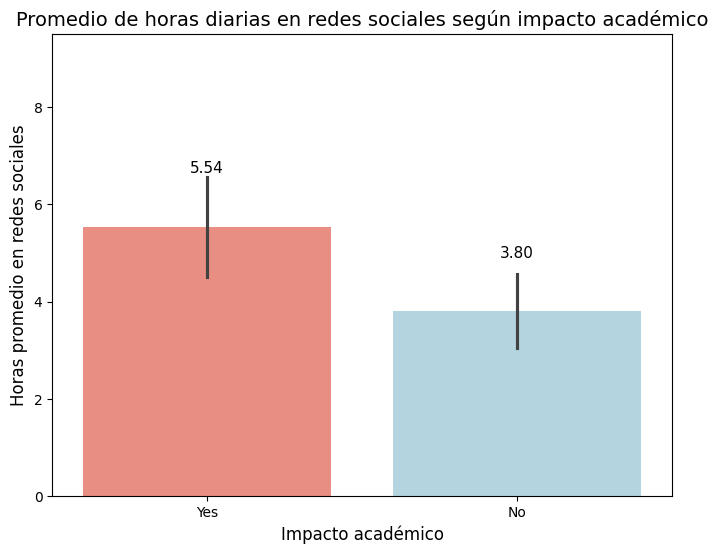

In [ ]:
order = ['Yes', 'No']
means = df.groupby('Affects_Academic_Performance')['Avg_Daily_Usage_Hours'].mean()

plt.figure(figsize=(8,6))

sns.barplot(
    x='Affects_Academic_Performance',
    y='Avg_Daily_Usage_Hours',
    data=df,
    order=order,
    errorbar='sd',
    hue='Affects_Academic_Performance',
    palette=['salmon', 'lightblue'],
    dodge=False,
    legend=False
)

plt.title('Promedio de horas diarias en redes sociales según impacto académico', fontsize=14)
plt.xlabel('Impacto académico', fontsize=12)
plt.ylabel('Horas promedio en redes sociales', fontsize=12)
plt.ylim(0, df['Avg_Daily_Usage_Hours'].max() + 1)

for i, cat in enumerate(order):
    plt.text(i, means[cat] + 1.10, f"{means[cat]:.2f}", ha='center', fontsize=11)

plt.show()

*Hipótesis 4*

Existen grupos de estudiantes con patrones similares de uso de redes sociales y efectos en relaciones o rendimiento académico.

¿Podemos identificar subgrupos de estudiantes según sus hábitos de redes sociales y nivel de afectación en relaciones o rendimiento?

Para analizar esta hipótesis, voy a utilizar estas variables:

Avg_Daily_Usage_Hours (horas en redes)

Sleep_Hours_Per_Night (horas de sueño)

Mental_Health_Score (salud mental)

Conflicts_Over_Social_Media (conflictos por redes sociales)

Affects_Academic_Performance (sí/no)

Realizo dos scatterplots bivariados con color por impacto académico para empezar a ver si los que duermen poco y usan muchas horas las redes tienden a tener impacto negativo en lo de académico, o si el puntaje de salud mental es más bajo en los de mayor uso.

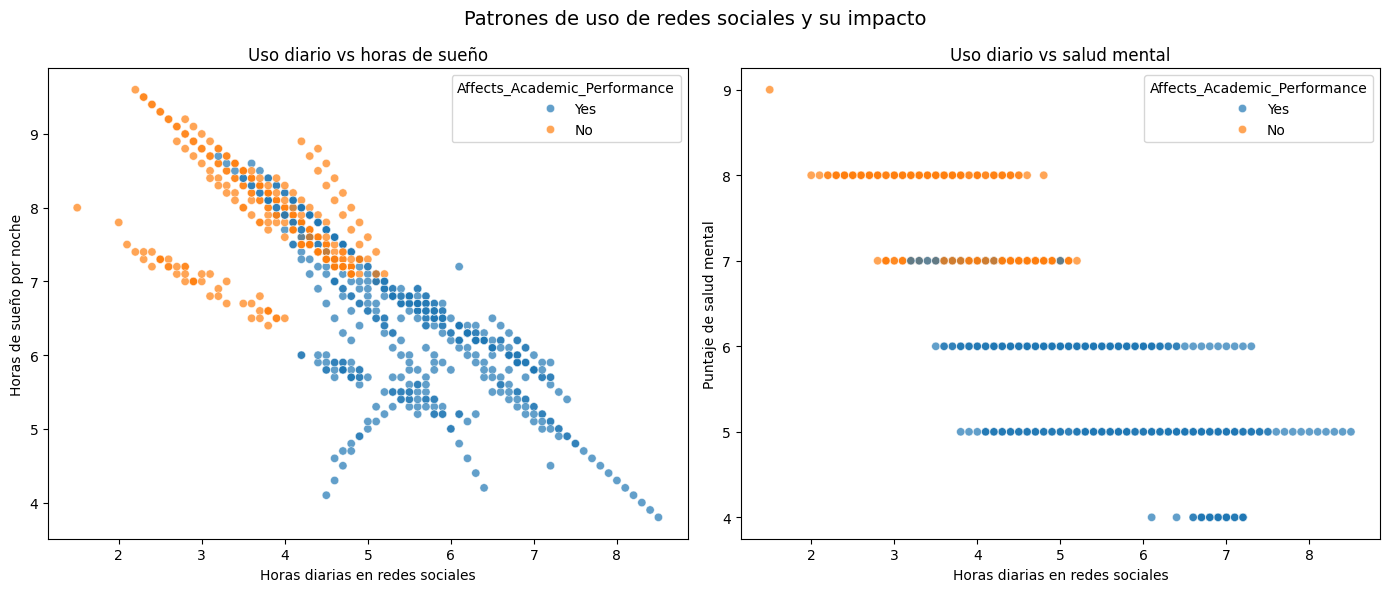

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14,6), sharex=True)

sns.scatterplot(x='Avg_Daily_Usage_Hours',
                y='Sleep_Hours_Per_Night',
                hue='Affects_Academic_Performance',
                data=df, alpha=0.7, ax=axes[0])
axes[0].set_title('Uso diario vs horas de sueño')
axes[0].set_xlabel('Horas diarias en redes sociales')
axes[0].set_ylabel('Horas de sueño por noche')

sns.scatterplot(x='Avg_Daily_Usage_Hours',
                y='Mental_Health_Score',
                hue='Affects_Academic_Performance',
                data=df, alpha=0.7, ax=axes[1])
axes[1].set_title('Uso diario vs salud mental')
axes[1].set_xlabel('Horas diarias en redes sociales')
axes[1].set_ylabel('Puntaje de salud mental')

plt.suptitle('Patrones de uso de redes sociales y su impacto', fontsize=14)
plt.tight_layout()
plt.show()

Uso diario vs. Horas de sueño
Se observa una clara correlación negativa: a medida que aumentan las horas de uso de redes sociales, las horas de sueño por noche tienden a disminuir. Además, el gráfico utiliza el color para diferenciar a los estudiantes según si el uso de redes sociales afecta su rendimiento académico.

Grupo "No" (naranja): Estos estudiantes, cuyo rendimiento académico no se ve afectado, tienden a usar menos redes sociales (en el rango de 2 a 5 horas) y a dormir más (generalmente entre 7 y 9 horas). Hay algunos valores atípicos que usan más horas de redes sociales, pero aun así mantienen un buen promedio de horas de sueño.

Grupo "Sí" (azul): Los estudiantes cuyo rendimiento académico se ve afectado usan más redes sociales (en el rango de 4 a 8 horas) y duermen menos, con un promedio que va de 4 a 7 horas. Este grupo muestra una dispersión más amplia en el uso de redes sociales, pero la tendencia a dormir menos es evidente.

Uso diario vs. Salud mental
El gráfico revela una correlación negativa, aunque no tan pronunciada como en el caso del sueño. A mayor uso de redes sociales, menor es el puntaje de salud mental.

Se observan grupos distintos de puntajes de salud mental (4, 5, 7, 8 y 9) que se mantienen relativamente estables independientemente de la cantidad de horas en redes sociales. Sin embargo, hay un grupo de estudiantes con puntajes de salud mental muy bajos (4) que se distribuyen en un rango más amplio de uso de redes sociales. Es importante notar que el grupo de estudiantes con una salud mental de 9 tiene un uso de redes sociales relativamente bajo.

En resumen, los gráficos sugieren que un mayor uso de redes sociales está asociado con una disminución de las horas de sueño y una reducción en el puntaje de salud mental. Estas tendencias son más pronunciadas en los estudiantes que reportan que su rendimiento académico se ve afectado.

Realizo un pairplot para ver patrones más amplios. De esta manera, puedo ver todos los pares de relaciones y ayuda a visualizar posibles subgrupos.

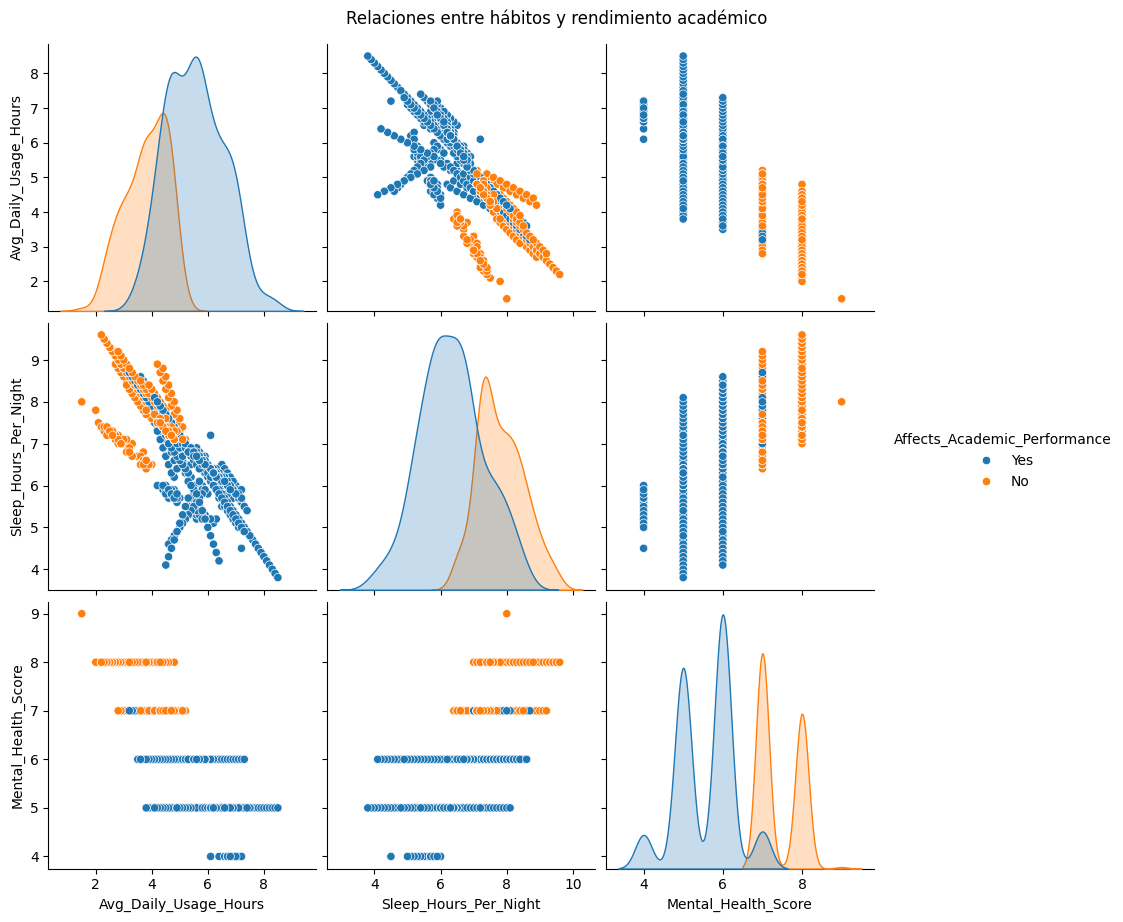

In [ ]:
sns.pairplot(df, vars=['Avg_Daily_Usage_Hours','Sleep_Hours_Per_Night','Mental_Health_Score'],
             hue='Affects_Academic_Performance', height=3)
plt.suptitle('Relaciones entre hábitos y rendimiento académico', y=1.02)
plt.show()

Este gráfico de pares confirma y profundiza las conclusiones del anterior. Los estudiantes que reportan que el uso de redes sociales afecta su rendimiento académico no solo tienden a usar más redes sociales, sino que también duermen menos y tienen un puntaje de salud mental más bajo. Esto sugiere una clara segmentación de la población estudiantil en dos subgrupos distintos, respaldando la hipótesis inicial de que existen patrones de uso de redes sociales y sus efectos en el rendimiento académico.

Realizo un heatmap de correlaciones para ver si hay asociaciones entre las variables numéricas.

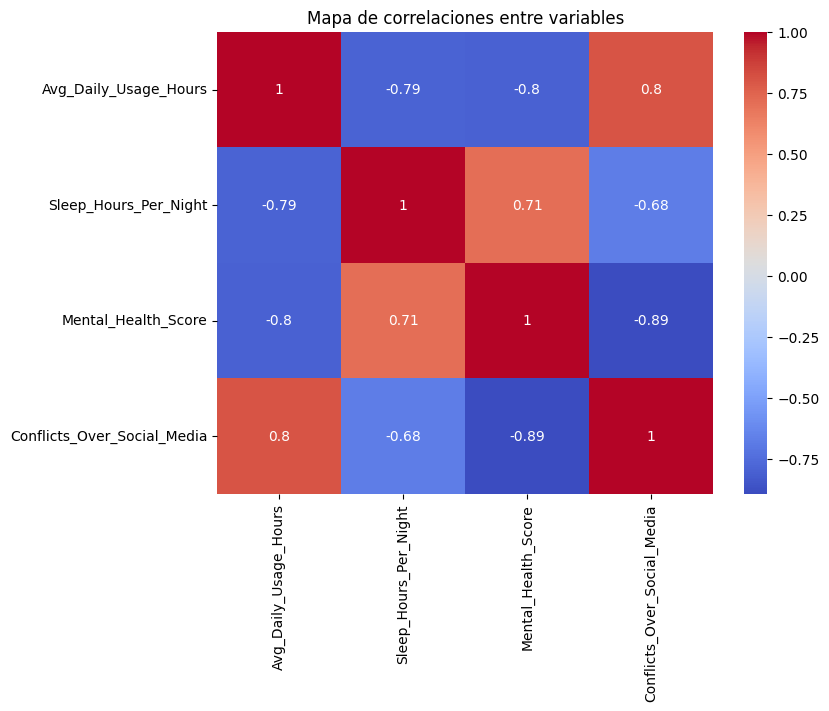

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Avg_Daily_Usage_Hours','Sleep_Hours_Per_Night','Mental_Health_Score','Conflicts_Over_Social_Media']].corr(),
            annot=True, cmap='coolwarm')
plt.title('Mapa de correlaciones entre variables')
plt.show()

Este mapa de calor confirma que existe un ciclo interconectado y perjudicial:
Mayor uso de redes sociales -> Menos horas de sueño y más conflictos -> Salud mental significativamente afectada.

**INSIGHTS**

*Hipótesis 1: Más horas en redes sociales generan mayor impacto negativo en relaciones y salud mental.*

Insights:

Uso bajo (≤3 h/día): pocos conflictos (0–2), buena salud mental (7–9).

Uso moderado (4–5 h/día): conflictos y salud mental intermedios.

Uso alto (≥6 h/día): conflictos altos (4–5), salud mental baja (4–6).

**Conclusión**: La hipótesis se confirma; se pueden segmentar subgrupos según hábitos y nivel de afectación.

*Hipótesis 2: Es posible predecir si un estudiante es adicto según edad, género y uso diario.*

Insights:

Edad: poco predictiva; rangos superpuestos.

Horas de uso: predictor principal. Medianas: No adicto 2.5–3 h, Leve 3.5–4 h, Moderado 4.5–5 h, Fuerte 6–7 h.

Género: diferencias leves, no determinante.

**Conclusión**: Tiempo de uso permite clasificar niveles de adicción; edad y género tienen poco peso. La mayoría de estudiantes son adictos leves a fuertes.

*Hipótesis 3: Horas diarias en redes predicen impacto académico negativo.*

Insights:

<3 h/día → probabilidad baja de impacto.

4–5 h/día → riesgo aumenta significativamente.

≥6 h/día → probabilidad cercana al 100%.

Promedio de uso más alto en estudiantes con afectación académica.

**Conclusión**: La hipótesis se confirma; el riesgo de impacto académico aumenta con el tiempo de uso.

*Hipótesis 4: Existen grupos de estudiantes con patrones similares de uso y efectos en relaciones o rendimiento.*

Insights:

Mayor uso = menos sueño y menor salud mental.

Mapa de calor evidencia un ciclo: más uso → menos sueño y más conflictos → salud mental afectada.

Subgrupos:

No afectado: menor uso, más sueño, mejor salud mental.

Afectado: mayor uso, menos sueño, menor salud mental.

**Conclusión**: La hipótesis se confirma; las variables interactúan en un ciclo perjudicial. La segmentación permite identificar grupos con riesgos interrelacionados.

**RECOMENDACIONES**

- Establecer límites de uso diario, especialmente para quienes superan 5 horas.

- Promover programas de concientización sobre los efectos del uso excesivo de redes.

- Monitorear a estudiantes de alto uso para ofrecer apoyo psicológico o estrategias de manejo de conflictos.

- Sensibilizar sobre la adicción digital, sin depender únicamente de edad o género.

- Combinar monitoreo de uso con programas de concientización sobre hábitos digitales y estudio.

- Intervenciones integrales que aborden simultáneamente uso de redes, hábitos de sueño, conflictos y salud mental.

- Programas educativos para reducir el tiempo en redes y fomentar rutinas saludables.

- Monitoreo constante de los estudiantes del grupo afectado para prevenir un deterioro progresivo en su bienestar y rendimiento.